In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


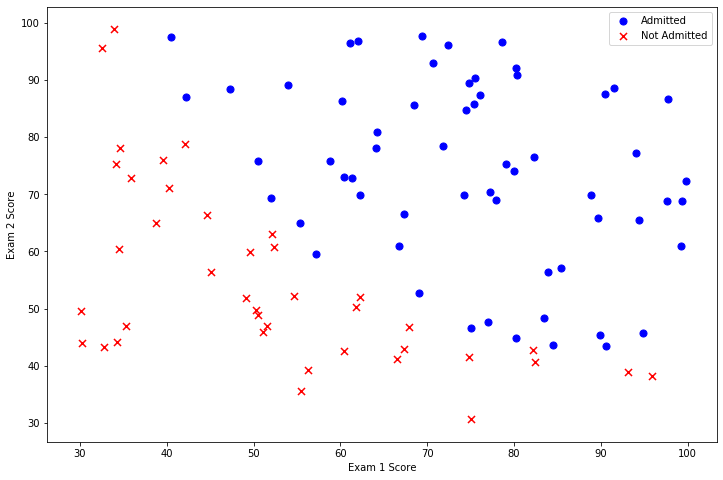

In [14]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [15]:
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
# Error: ComputeCost(X, y, theta)
def ComputeCost(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    iter1 = np.multiply(-y, np.log(Sigmoid(X * theta.T)))
    iter2 = np.multiply((1 - y), np.log(1 - Sigmoid(X * theta.T)))
    return np.sum(iter1 - iter2) / len(X)

In [17]:
# Error: Gradient(X, y, theta)
def Gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    term1 = Sigmoid(X * theta.T) - y
    for i in range(parameters):
        term2 = np.multiply(term1, X[:, i])
        grad[i] = np.sum(term2) / len(X)
    return grad

In [18]:
data.insert(0, 'theta0', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [19]:
ComputeCost(theta, X, y)

0.6931471805599453

In [20]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=ComputeCost, x0=theta, fprime=Gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [21]:
ComputeCost(result[0], X, y)

0.20349770158947458

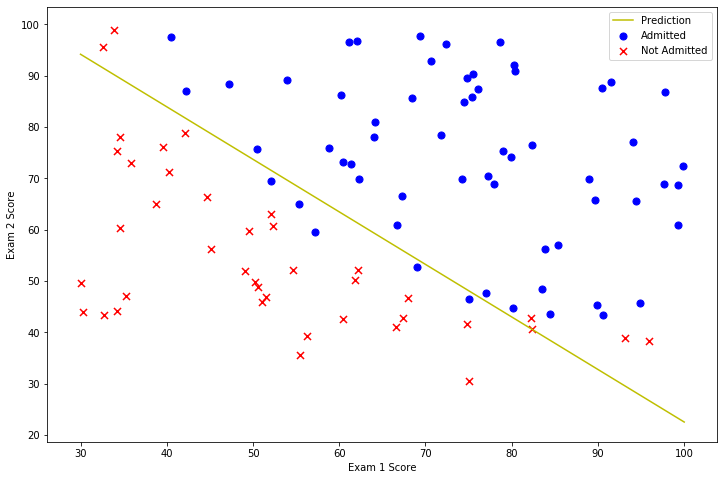

In [23]:
plotting_x1 = np.linspace(30, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [36]:
# 评价逻辑回归模型
def AdmittedProb(theta, X):
    return Sigmoid(np.dot(theta.T, X))
                   
print(AdmittedProb(result[0], [1,45,85]))
print(AdmittedProb(result[0], [1,65,85]))
print(AdmittedProb(result[0], [1,95,85]))

0.7762906238162848
0.9953619432368059
0.9999904193794665


In [37]:
# 定义预测函数
def Predict(theta, X):
    result = AdmittedProb(theta, X)
    if result > 0.5:
        return 1
    else:
        return 0
print(Predict(result[0], [1,25,85]))
print(Predict(result[0], [1,45,85]))
print(Predict(result[0], [1,95,85]))

0
1
1


In [38]:
# 统计预测正确率
resultList = np.zeros(len(X))
correctnum = 0
for i in range(len(X)):
    resultList[i] = Predict(result[0], X[i])
    if resultList[i] == y[i]:
        correctnum += 1
accuracy = correctnum / len(X) 
accuracy

0.89